In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
def calculate_edit_distance_matrix(word1, word2):
    word1 = "#" + word1
    word2 = "#" + word2

    matrix = np.zeros((len(word1), len(word2))).astype(int)

    matrix[:, 0] = np.arange(len(word1))
    matrix[0, :] = np.arange(len(word2))

    for i in range(1, len(word1)):
        for j in range(1, len(word2)):
            if word1[i] == word2[j]:
                matrix[i, j] = matrix[i - 1, j - 1]

            else:
                matrix[i, j] = min(matrix[i-1, j-1] + 2, matrix[i-1, j] + 1, matrix[i, j-1] + 1)

    return matrix

def get_next_action(loc, word1, word2):
    i, j = loc
    action_idx = np.argmin([matrix[i - 1, j], matrix[i-1, j-1], matrix[i, j - 1]])
    
    if action_idx == 0:
        action = f"delete {word1[i]}"
        i -= 1
    elif action_idx == 1:
        if matrix[i-1, j-1] == matrix[i, j]:
            action = f"same letter so continue"
        else:
            action = f"replace {word1[i]} with {word2[j ]}"
            
        i -= 1
        j -= 1
    else:
        action = f"Insert {word2[j]}"
        j -= 1 
        
    return (i, j), action

def retrieve_backtrace(word1, word2):
    word1 = "#" + word1
    word2 = "#" + word2
    
    loc = (len(word1) - 1, len(word2) - 1)
    actions = []

    while loc[0] != 0 or loc[1] != 0:
        loc, action = get_next_action(loc, word1, word2)
        actions.append(action)

    if i != 0 or j != 0:
        raise ValueError('Backtrace did not go back to the origin')
    return actions[::-1]

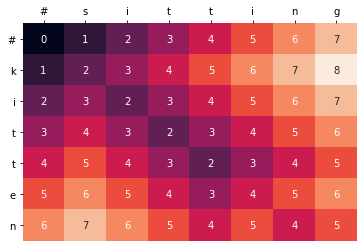

['replace k with s',
 'same letter so continue',
 'same letter so continue',
 'same letter so continue',
 'replace e with i',
 'same letter so continue',
 'Insert g']

In [86]:
word1 = 'kitten'
word2 = 'sitting'

matrix = calculate_edit_distance_matrix(word1, word2)

ax = sns.heatmap(matrix, annot=True, cbar=False)
ax.xaxis.set_ticks_position('top')
ax.set_yticklabels('#' + word1, rotation=0)
ax.set_xticklabels('#' + word2)
plt.show()

retrieve_backtrace(word1, word2)